In [31]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [32]:
sns.set_theme(style="whitegrid")
soubory = glob.glob("data/*.csv") + glob.glob("data/*.CSV")
dataframes = []

In [33]:
for f in soubory:
    df = pd.read_csv(f)
    dataframes.append(df)
df_all = pd.concat(dataframes, ignore_index=True)
df_all['hodnota'] = pd.to_numeric(df_all['hodnota'], errors='coerce').fillna(0)


In [34]:
# Filtr pro celou ČR pouze celkové součty 
df_cz = df_all[
    (df_all['vuzemi_cis'] == 97) & 
    (df_all['pohlavi_txt'].isna()) & 
    (df_all['vek_txt'].isna())
].copy()

df_regions = df_all[
    (df_all['vuzemi_cis'] == 101) &
    (df_all['pohlavi_txt'].isna()) & 
    (df_all['vek_txt'].isna())
].copy()

df_cz_total = df_all[
    (df_all['vuzemi_cis'] == 97) &       # Celá ČR
    (df_all['pohlavi_txt'].isna()) &     # Všechna pohlaví
    (df_all['vek_txt'].isna()) &         # Všechny věkové kategorie
    (df_all['stobcan_txt'].isna())       # Všechna občanství 
].copy()

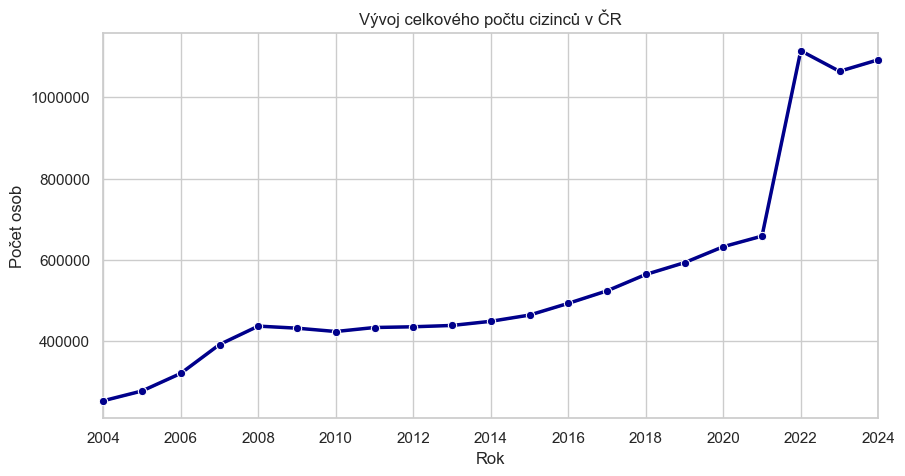

In [35]:
# vývoj celkového počtu cizinců v ČR
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df_cz_total, 
    x='rok', 
    y='hodnota', 
    marker='o', 
    linewidth=2.5, 
    color='darkblue',
    clip_on=False,
    zorder=10
)

plt.title('Vývoj celkového počtu cizinců v ČR')
plt.ylabel('Počet osob')
plt.xlabel('Rok')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca() 
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True)) 
plt.xlim(df_cz_total['rok'].min(), df_cz_total['rok'].max())
plt.grid(True)
plt.show()

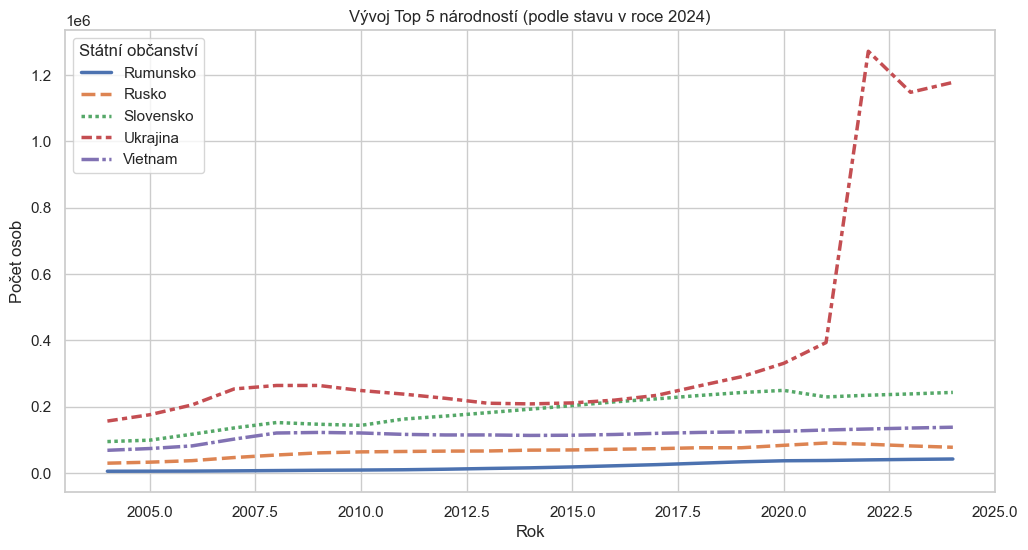

In [36]:

# graf pro 5 největších skupin podle státního občanství v posledním roce
max_rok = df_cz['rok'].max()
top_zeme = df_cz[df_cz['rok'] == max_rok].groupby('stobcan_txt')['hodnota'].sum().sort_values(ascending=False).head(5).index.tolist()
df_top = df_cz[df_cz['stobcan_txt'].isin(top_zeme)]
df_top_pivot = df_top.pivot_table(index='rok', columns='stobcan_txt', values='hodnota', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_pivot, linewidth=2.5)
plt.title(f'Vývoj Top 5 národností (podle stavu v roce {max_rok})')
plt.ylabel('Počet osob')
plt.xlabel('Rok')
plt.legend(title='Státní občanství')
plt.show()


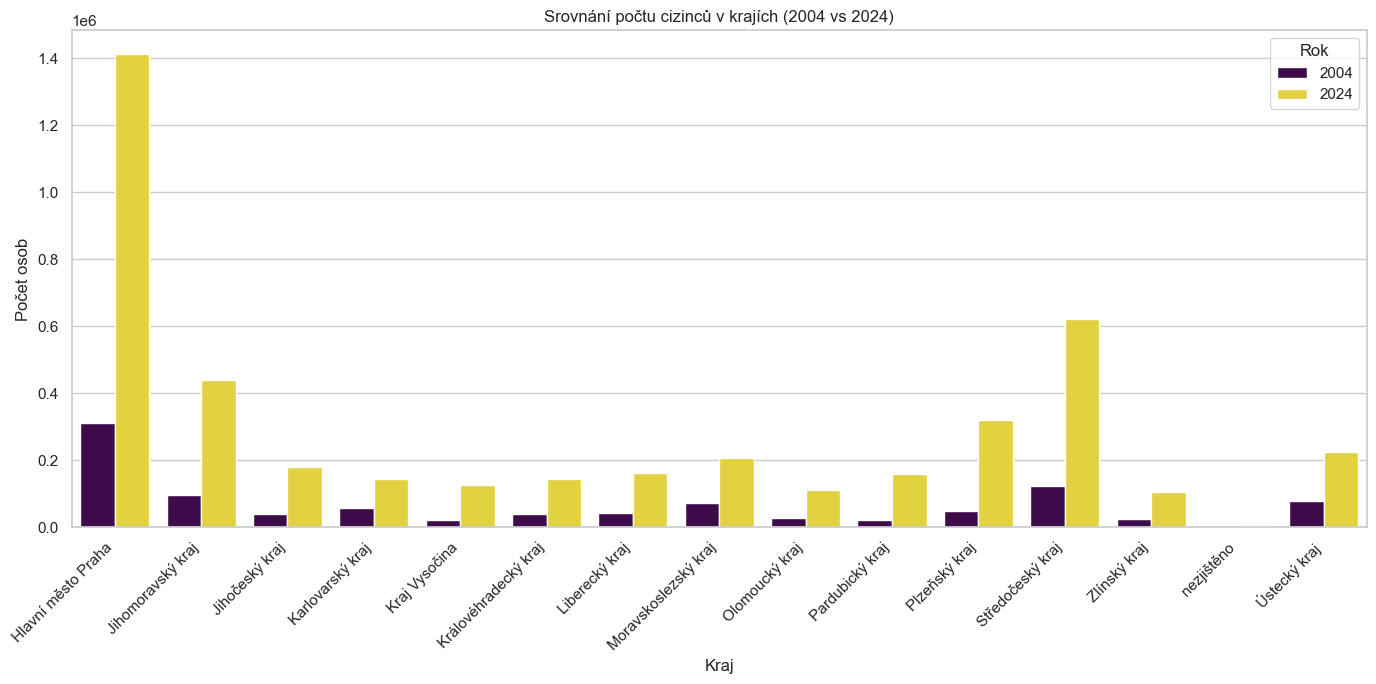

In [37]:
# cizinci podle krajů - 2004 - 2024
roky_srovnani = [2004, max_rok]
df_reg_comp = df_regions[df_regions['rok'].isin(roky_srovnani)]
regional_dist = df_reg_comp.groupby(['rok', 'kraj_txt'])['hodnota'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=regional_dist, x='kraj_txt', y='hodnota', hue='rok', palette='viridis')
plt.title(f'Srovnání počtu cizinců v krajích ({roky_srovnani[0]} vs {roky_srovnani[1]})')
plt.xlabel('Kraj')
plt.ylabel('Počet osob')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rok')
plt.tight_layout()
plt.show()